In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os





In [5]:
os.chdir('/Users/phil/Downloads')

ccrb = pd.read_excel("ccrb_datatransparencyinitiative.xlsx",sheet_name='Complaints_Allegations')

In [6]:
ccrb.head()

,DateStamp,UniqueComplaintId,Close Year,Received Year,Borough of Occurrence,Is Full Investigation,Complaint Has Video Evidence,Complaint Filed Mode,Complaint Filed Place,Complaint Contains Stop & Frisk Allegations,Incident Location,Incident Year,Encounter Outcome,Reason For Initial Contact,Allegation FADO Type,Allegation Description
0,2016-11-29,11,2006,2005,Manhattan,False,False,On-line website,CCRB,False,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest
1,2016-11-29,18,2006,2004,Brooklyn,True,False,Phone,CCRB,False,Street/highway,2004,Arrest,PD suspected C/V of violation/crime - street,Abuse of Authority,Refusal to obtain medical treatment
2,2016-11-29,18,2006,2004,Brooklyn,True,False,Phone,CCRB,False,Street/highway,2004,Arrest,PD suspected C/V of violation/crime - street,Discourtesy,Word
3,2016-11-29,18,2006,2004,Brooklyn,True,False,Phone,CCRB,False,Street/highway,2004,Arrest,PD suspected C/V of violation/crime - street,Discourtesy,Word
4,2016-11-29,18,2006,2004,Brooklyn,True,False,Phone,CCRB,False,Street/highway,2004,Arrest,PD suspected C/V of violation/crime - street,Discourtesy,Word


## A project on the CCRB dataset
the data is from Civilian Complaint Review Board (CCRB), a fully independent NYC board which
investigate complaints of alleged misconduct on the part of the New York City Police Department.
* The goal of the project is to come up with an application for the police department which uses the data to group each officer against the number of complaints raised i.e rank officers against compaints raised. The application should also be able to show the  most type of allegations raised for each officer and be able to recommend course of action to take for example giving a warning or if the allegations are too many take a different course of action like encouraging anger management classes to the concerned officer or dismissal 


#### complaints received each year vs complaints with video evidence each year

## Exploratory Data Analysis
The analysis will look at some interesting patterns which can be deduced from this dataset.

In [7]:
video_evidence = ccrb[ccrb["Complaint Has Video Evidence"]==True]
complaints_per_year = ccrb[['UniqueComplaintId','Received Year']].groupby('Received Year').count()
complaints_per_year.index = pd.to_datetime(complaints_per_year.index,format="%Y")

complaints_with_video_per_year =video_evidence[['Complaint Has Video Evidence','Received Year']].groupby('Received Year').count()


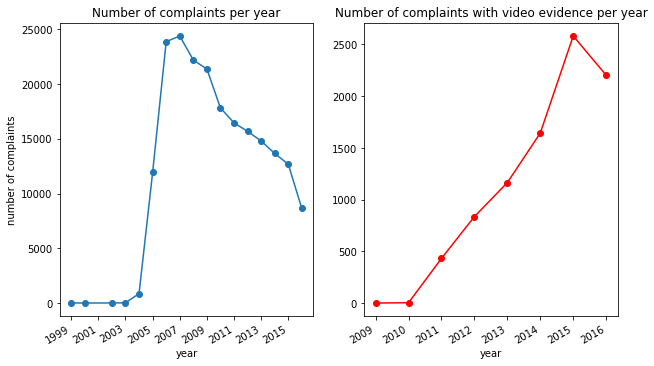

In [8]:
# plot it
f, (ax0, ax1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(10,6))
ax0.plot(complaints_per_year.index,complaints_per_year.UniqueComplaintId,'o-')
ax1.plot(complaints_with_video_per_year.index,complaints_with_video_per_year['Complaint Has Video Evidence'],'ro-')
ax0.set_xlabel('year')
ax1.set_xlabel('year')
ax0.set_ylabel('number of complaints')
ax0.set_title('Number of complaints per year')
ax1.set_title('Number of complaints with video evidence per year')
f.autofmt_xdate()
plt.show()


number of complaints started increasing from 2003 and the biggest jump was from 2004 to 2005 and they reached their pick in 2007 and they started to decrease gradually. One reason l can attribute this gradual decrease is maybe better police training and also use of videos discouraged police to mistreat citizen
the right graph is about the total number of video evidence each year
From the 2 graphs we can deduce that there is a clear relationship each year from 2009 between number of complaints  and complaints with video evidence. As the number of video evidence increases the number of complaints decreases.

##### graph to show the relationship of different types of complaint file mode  with time

In [9]:
ccrb['Complaint Filed Mode'].value_counts()

Phone                     133588
Call Processing System     42447
On-line website            14197
In-person                   9586
Mail                        3424
E-mail                       799
Fax                          356
Name: Complaint Filed Mode, dtype: int64

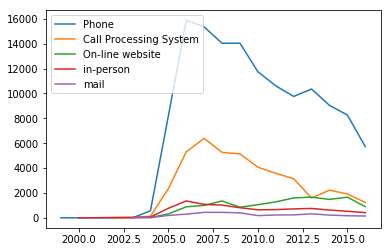

In [10]:
phone_data = ccrb[ccrb["Complaint Filed Mode"]=='Phone']
phone_calls_per_year =phone_data[['Complaint Filed Mode','Received Year']].groupby('Received Year').count()
call_system = ccrb[ccrb["Complaint Filed Mode"]=='Call Processing System']
call_system_per_year =call_system[['Complaint Filed Mode','Received Year']].groupby('Received Year').count()
online_data = ccrb[ccrb["Complaint Filed Mode"]=='On-line website']
online_complaints_per_year =online_data[['Complaint Filed Mode','Received Year']].groupby('Received Year').count()
inperson_data = ccrb[ccrb["Complaint Filed Mode"]=='In-person']
inperson_complaints_per_year =inperson_data[['Complaint Filed Mode','Received Year']].groupby('Received Year').count()
mail_data = ccrb[ccrb["Complaint Filed Mode"]=='Mail']
mail_complaints_per_year =mail_data[['Complaint Filed Mode','Received Year']].groupby('Received Year').count()

fig, ax = plt.subplots()
ax.plot(phone_calls_per_year.index,phone_calls_per_year['Complaint Filed Mode'],label ='Phone')
ax.plot(call_system_per_year.index,call_system_per_year['Complaint Filed Mode'],label ='Call Processing System')
ax.plot(online_complaints_per_year.index,online_complaints_per_year['Complaint Filed Mode'],label ='On-line website')
ax.plot(inperson_complaints_per_year.index,inperson_complaints_per_year['Complaint Filed Mode'],label ='in-person')
ax.plot(mail_complaints_per_year.index,mail_complaints_per_year['Complaint Filed Mode'],label ='mail')

ax.legend()

plt.show()


the number of online complaints have been increasing whilst those of phone and call processing system have been decreasing. the project l would want to do is to use data collected through online websites and use natural language processing to find some interesting patterns from on complaints.


#### compaints against incident location

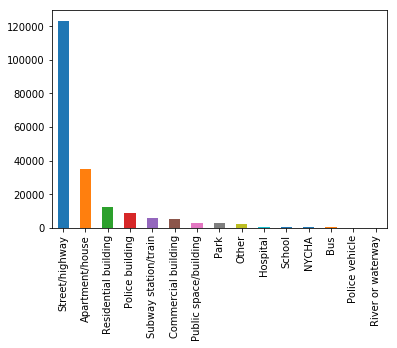

In [11]:
ccrb['Incident Location'].value_counts().plot('bar')

most complaints come from incidents which occur in highway followed by apartments/houses